# Gather

In [650]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json 
import seaborn as sns
import matplotlib.pyplot as plt
import os
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [651]:
#read the file that download by clicking the url
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [652]:
#download the file with Requests library
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as f:
    f.write(response.content)

In [653]:
image=pd.read_csv('image_predictions.tsv',sep='\t')

In [654]:
tweet_id_list = archive.tweet_id.values
tweet_id_list

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149])

In [655]:
#as the project instrution request, I remove the key and token while submitting the project
consumer_key = '****'
consumer_secret = 'GAJCchP66HMANVWKsn1GIT4j68Op4C2GFfYAwxiMzyIfFTXS8m'
access_token = '****'
access_secret = 'T6npMZIpvwFocazzCVAgAP7kR1r8dhRFY221nRwqmDHcT'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [656]:
tweet_json_list = []
tweet_errors = []

for x in tweet_id_list:
    print x
    try:
        tweet = api.get_status(x, tweet_mode='extended')
        tweet_json_list.append(tweet._json)
    except Exception as e:
        tweet_errors.append((x,e))

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560
882268110199369728
882045870035

In [657]:
out_file = open('tweet_json.txt', 'w')

for tweet_json in tweet_json_list:
    out_file.write(json.dumps(tweet_json) + '\n')

out_file.close()

In [658]:
#read the file downloaded with Tweepy
tt = pd.read_json('tweet_json.txt', lines=True)
tweet = tt[['id','retweet_count','favorite_count']]

# Assess

In [659]:
archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id                  timestamp                                                                               source                                                                                                                                                                       text  retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    expanded_urls  rating_numerator  rating_denominator            name  \
0     892420643555336193                    NaN                  NaN  2017-08-01 16:23:56 +0000   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                              This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                  NaN                       NaN                        NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1                13                  10         Phineas   
1     892177421306343426                    NaN                  NaN  2017-08-01 00:17:27 +0000   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>         This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV                  NaN                       NaN                        NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1                13                  10           Tilly   
2     891815181378084864                    NaN                  NaN  2017-07-31 00:18:03 +0000   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                          This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                  NaN                       NaN                        NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1                12                  10          Archie   
3     891689557279858688        

In [660]:
image

tweet_id                                                                                  jpg_url  img_num                              p1   p1_conf p1_dog                              p2       p2_conf p2_dog                              p3       p3_conf p3_dog
0     666020888022790149                                          https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1          Welsh_springer_spaniel  0.465074   True                          collie  1.566650e-01   True               Shetland_sheepdog  6.142850e-02   True
1     666029285002620928                                          https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1                         redbone  0.506826   True              miniature_pinscher  7.419170e-02   True             Rhodesian_ridgeback  7.201000e-02   True
2     666033412701032449                                          https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1                 German_shepherd  0.596461   True                        malinois  1.385840e-01   True                      bloodhound  1.161970e-01   True
3     666044226329800704                                          https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg        1             Rhodesian_ridgeback  0.408143   True                         redbone  3.606870e-01   True              miniature_pinscher  2.227520e-01   True
4     666049248165822465                                          https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg        1              miniature_pinscher  0.560311   True                      Rottweiler  2.436820e-01   True                        Doberman  1.546290e-01   True
5     666050758794694657                                          https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg        1            Bernese_mountain_dog  0.651137   True                English_springer  2.637880e-01   True      Greater_Swiss_Mountain_dog  1.619920e-02   True
6     666051853826850816                                          https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg        1                      box_turtle  0.933012  False                      mud_turtle  4.588540e-02  False                        terrapin  1.788530e-02  False
7     666055525042405380                                          https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg        1                            chow  0.692517   True                 Tibetan_mastiff  5.827940e-02   True                        fur_coat  5.444860e-02  False
8     666057090499244032                                          https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg        1                   shopping_cart  0.962465  False                 shopping_basket  1.459380e-02  False                golden_retriever  7.958960e-03   True
9     666058600524156928                                          https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg        1                miniature_poodle  0.201493   True                        komondor  1.923050e-01   True     soft-coated_wheaten_terrier  8.208610e-02   True
10    666063827256086533                                          https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg        1                golden_retriever  0.775930   True                 Tibetan_mastiff  9.371780e-02   True              Labrador_retriever  7.242660e-02   True
11    666071193221509120                                          https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg        1                   Gordon_setter  0.503672   True               Yorkshire_terrier  1.742010e-01   True                        Pekinese  1.094540e-01   True
12    666073100786774016                                          https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg        1                    Walker_hound  0.260857   True                English_foxhound  1.753820e-01   True                    Ibizan_hound  9.747050e-02   True
13    666082916733198337                                          https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg        1  

In [661]:
tweet

id  retweet_count  favorite_count
0     892420643555336193           8805           39404
1     892177421306343426           6453           33723
2     891815181378084864           4279           25396
3     891689557279858688           8890           42753
4     891327558926688256           9683           40917
5     891087950875897856           3222           20511
6     890971913173991426           2132           12031
7     890729181411237888          19493           66561
8     890609185150312448           4375           28145
9     890240255349198849           7650           32387
10    890006608113172480           7544           31046
11    889880896479866881           5097           28152
12    889665388333682689           8469           38640
13    889638837579907072           4680           27559
14    889531135344209921           2298           15307
15    889278841981685760           5607           25650
16    888917238123831296           4654           29506
17    888804989199671297           4511           25964
18    888554962724278272           3705           20226
19    888078434458587136           3617           22102
20    887705289381826560           5562           30631
21    887517139158093824          12009           46827
22    887473957103951883          18716           69854
23    887343217045368832          10676           34145
24    887101392804085760           6125           30987
25    886983233522544640           8002           35698
26    886736880519319552           3401           12255
27    886680336477933568           4585           22755
28    886366144734445568           3279           21441
29    886267009285017600              4             117
30    886258384151887873           6480           28383
31    886054160059072513            106               0
32    885984800019947520           7016           33223
33    885528943205470208           6620           36526
34    885518971528720385           3867           20699
35    885311592912609280          19139               0
36    885167619883638784           4510           22256
37    884925521741709313          19090           78732
38    884876753390489601           6024           28362
39    884562892145688576           5066           24670
40    884441805382717440           5818           27375
41    884247878851493888          21040           74034
42    884162670584377345           3089           20691
43    883838122936631299           3546           22217
44    883482846933004288          10306           46629
45    883360690899218434           3787           22865
46    883117836046086144           6879           37739
47    882992080364220416           4071           24320
48    882762694511734784           5069           28751
49    882627270321602560           6278           28293
50    882268110199369728          11971           45656
51    882045870035918850           5144           29779
52    881906580714921986           3506           24664
53    881666595344535552          10996           51291
54    881633300179243008              7             129
55    881536004380872706          16507           50189
56    881268444196462592           5315           23409
57    880935762899988482           2863           17248
58    880872448815771648           3940           21631
59    880465832366813184           6468           28923
60    880221127280381952           4380           27500
61    880095782870896641           4487           28020
62    879862464715927552           3610           22588
63    879674319642796034             10             316
64    879492040517615616           3289           23731
65    879415818425184262          45544          107548
66    879376492567855104           3226           17021
67    879130579576475649           7100               0
68    879050749262655488           4874           22927
69    879008229531029506           2787           19230
70    878776093423087618           4271       

In [662]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [663]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


In [664]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2351 entries, 0 to 2350
Data columns (total 3 columns):
id                2351 non-null int64
retweet_count     2351 non-null int64
favorite_count    2351 non-null int64
dtypes: int64(3)
memory usage: 73.5 KB


In [665]:
#see if there's any duplicate columns 
all_columns = pd.Series(list(archive) + list(image) + list(tweet))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

In [666]:
archive.sample(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id                  timestamp                                                                              source                                                                                                                                             text  retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp                                                                                                                                                                                                                                                expanded_urls  rating_numerator  rating_denominator   name doggo floofer  pupper puppo
335   832645525019123713                    NaN                  NaN  2017-02-17 17:38:57 +0000                  <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                                         There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  \nhttps://t.co/dp5h9bCwU7                  NaN                       NaN                        NaN                                                                                http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_                10                  10    not  None    None    None  None
1367  702598099714314240                    NaN                  NaN  2016-02-24 20:56:55 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>             This is Sansa. She's gotten too big for her chair. Not so smol anymore. 11/10 once a pupper, always a pupper https://t.co/IpAoztle2s                  NaN                       NaN                        NaN                                                                                                                                                                                              https://twitter.com/dog_rates/status/702598099714314240/photo/1                11                  10  Sansa  None    None  pupper  None
508   812503143955202048                    NaN                  NaN  2016-12-24 03:40:19 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  I'm happy to inform you all that Jake is in excellent hands. 13/10 for him and his new family \nhttps://t.co/LRCTJpnCnS https://t.co/wZz7fI6XO1                  NaN                       NaN                        NaN  https://m.facebook.com/story.php?story_fbid=1888712391349242&id=1506300642923754&refsrc=http%3A%2F%2Ft.co%2FURVffYPPjY&_rdr,https://twitter.com/dog_rates/status/812503143955202048/photo/1,https://twitter.com/dog_rates/status/812503143955202048/photo/1                13                  10   None  None    None    None  None

In [667]:
#check if there's any duplicate ID
archive[archive.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [668]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [669]:
#The denominators, which are not 10, are suspicious, so I would like to see look into them closely
pd.set_option('display.max_colwidth', 1000)
suspicious_denominator=archive.loc[archive['rating_denominator'] != 10, ['tweet_id','text','rating_numerator','rating_denominator']]

In [670]:
suspicious_denominator

tweet_id                                                                                                                                                                       text  rating_numerator  rating_denominator
313   835246439529840640                                                                         @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho               960                   0
342   832088576586297345                                                                                                                                   @docmisterio account started on 11/15/15                11                  15
433   820690176645140481                                                                        The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                84                  70
516   810984652412424192  Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx                24                   7
784   775096608509886464                               RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…                 9                  11
902   758467244762497024                                                                                             Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE               165                 150
1068  740373189193256964                               After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ                 9                  11
1120  731156023742988288                                                  Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv               204                 170
1165  722974582966214656                                                                                                           Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                 4                  20
1202  716439118184652801                                                      This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq                50                  50
1228  713900603437621249                                                                              Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1                99                  90
1254  710658690886586372                                                               Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12                80                  80
1274  709198395643068416                         From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK                45                  50
1351  704054845121142784                                                                                         Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa                60                  50
1433  697463031882764288                                                                               Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ                44                  40
1598  686035780142297088                                   Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating                 4                  20
1634  684225744407494656              

In [671]:
len(suspicious_denominator)

23

In [672]:
#use the same way to check if there is any suspicious numerator 
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [673]:
suspicious_numerator=archive.loc[archive['rating_numerator'] >20, ['tweet_id','text','rating_numerator','rating_denominator']]
suspicious_numerator

tweet_id                                                                                                                                                                       text  rating_numerator  rating_denominator
188   855862651834028034                                                                                     @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research               420                  10
189   855860136149123072                                      @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10               666                  10
290   838150277551247360                                                                                                                                                         @markhoppus 182/10               182                  10
313   835246439529840640                                                                         @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho               960                   0
340   832215909146226688                               RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…                75                  10
433   820690176645140481                                                                        The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                84                  70
516   810984652412424192  Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx                24                   7
695   786709082849828864                                           This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                75                  10
763   778027034220126208          This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq                27                  10
902   758467244762497024                                                                                             Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE               165                 150
979   749981277374128128                                                                                             This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh              1776                  10
1120  731156023742988288                                                  Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv               204                 170
1202  716439118184652801                                                      This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq                50                  50
1228  713900603437621249                                                                              Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1                99                  90
1254  710658690886586372                                                               Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12                80                  80
1274  709198395643068416                         From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK                45                  50
1351  704054845121142784              

In [674]:
archive.name.value_counts().head(20)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Penny       10
Lola        10
Tucker      10
Winston      9
Bo           9
the          8
Sadie        8
Daisy        7
Toby         7
Bailey       7
Buddy        7
an           7
Stanley      6
Koda         6
Name: name, dtype: int64

In [675]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [676]:
#see if there's anything worng with the values, such as format or quality issue
image.p1.value_counts()

golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
malamute                           30
cocker_spaniel                     30
French_bulldog                     26
miniature_pinscher                 23
Chesapeake_Bay_retriever           23
seat_belt                          22
Staffordshire_bullterrier          20
German_shepherd                    20
Siberian_husky                     20
web_site                           19
Cardigan                           19
beagle                             18
teddy                              18
Shetland_sheepdog                  18
Eskimo_dog                         18
Maltese_dog                        18
Rottweiler                         17
Lakeland_ter

In [677]:
image.p2.value_counts().head(15)

Labrador_retriever          104
golden_retriever             92
Cardigan                     73
Chihuahua                    44
Pomeranian                   42
Chesapeake_Bay_retriever     41
French_bulldog               41
toy_poodle                   37
cocker_spaniel               34
Siberian_husky               33
miniature_poodle             33
beagle                       28
Pembroke                     27
collie                       27
Eskimo_dog                   27
Name: p2, dtype: int64

In [678]:
image.p3.value_counts().head(15)

Labrador_retriever           79
Chihuahua                    58
golden_retriever             48
Eskimo_dog                   38
kelpie                       35
kuvasz                       34
chow                         32
Staffordshire_bullterrier    32
beagle                       31
cocker_spaniel               31
toy_poodle                   29
Pekinese                     29
Pomeranian                   29
Chesapeake_Bay_retriever     27
Great_Pyrenees               27
Name: p3, dtype: int64

In [679]:
tweet[tweet.id.duplicated()]

Empty DataFrame
Columns: [id, retweet_count, favorite_count]
Index: []

In [680]:
aid = set(archive['tweet_id'].unique())
len(aid)

2356

In [681]:
iid = set(image['tweet_id'].unique())
len(iid)

2075

In [682]:
tid = set(tweet['id'].unique())
len(tid)

2351

In [683]:
id_intersect = iid.intersection(aid).intersection(tid)
len(id_intersect)

2072

### Quality Issues:

##### Archive Table
- Accordig to the project instruction, We only want original ratings (no retweets) that have images, so 
  the retweets data should be removed.
- Erroneous datatypes (tweet_id,timestamp, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id)
- 12 ratings are incorrect
- The data in *source* column are unreadable HTML text. 

##### Image Table
- Nondescriptive column headers
- Erroneous datatypes (tweet_id)
- Some of values in the *p1*, *p2* and *p2* start with a capital letter;some don't. They should be consistent.
- Most values in the *p1*, *p2* and *p3* are the breeds of dogs, so they should covert to categorical variables.

##### Tweet Table
- Erroneous datatypes (id)

### Tidiness Issues:

##### Archive Table
- One variable in 4 columns (there are 4 different columns for dog stages)

##### Image Table
- The p1 and p1_dog columns will be used for analysis and vizualization later, so they can be a subset of the `Archive` table.

##### Tweet Table
- Tweet should be part of the `Archive` table


# Cleaning

In [684]:
archive_clean=archive.copy()
image_clean=image.copy()
tweet_clean=tweet.copy()

### Archive Table

#### Issue 1. Accordig to the project instruction, We only want original ratings (no retweets) that have images, so the retweets data should be removed.

##### Define
- Use the variables 'retweeted_status_user_id' and 'in_reply_to_user_id' to idenfity the retweets, and remove the retweet data. 
- Drop five retweet related columns: 'in_reply_to_user_id', 'in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp'.

##### Code

In [685]:
archive_clean=archive_clean[archive_clean.retweeted_status_user_id.isnull()]
archive_clean=archive_clean[archive_clean.in_reply_to_user_id.isnull()]

In [686]:
archive_clean=archive_clean.drop(['in_reply_to_user_id', 'in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1)


##### Test

In [687]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### Issue 2. One variable in 4 columns (there are 4 different columns for dog stages)

##### Define
- Melt the *doggo*, *floofer*, *pupper* and *puppo* columns to a *Dog_Stage* column and covert the variables to categorical variables.
- Drop the *doggo*, *floofer*, *pupper* and *puppo* columns.

##### Code

In [688]:
def concat_stages(row):
    stages = []
    all_stages = ['doggo', 'floofer', 'pupper', 'puppo']
    
    for stage in all_stages:
        if row[stage] != 'None':
            stages.append(stage)

    return ' '.join(sorted(stages))

archive_clean['Dog_Stage'] = archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(
    concat_stages, axis=1
)

In [689]:
archive_clean=archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [690]:
archive_clean.Dog_Stage=archive_clean.Dog_Stage.astype('category')

##### Test

In [691]:
archive_clean.Dog_Stage.value_counts()

                 1761
pupper            221
doggo              72
puppo              23
floofer             9
doggo pupper        9
doggo puppo         1
doggo floofer       1
Name: Dog_Stage, dtype: int64

In [692]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
Dog_Stage             2097 non-null category
dtypes: category(1), int64(3), object(5)
memory usage: 149.6+ KB


#### Issue 3. Tweet should be part of the `Archive` table

##### Define
Merge the *retweet_count* and *favorite_count* columns to the `Archive` table, joining on *tweet_id*.

##### Code

In [693]:
tweet_clean = tweet_clean.rename(columns={'id': 'tweet_id', 'retweet_count': 'retweet_count','favorite_count': 'favorite_count'})

archive_clean = pd.merge(archive_clean, tweet_clean,
                            on=['tweet_id'], how='left') 

##### Test

In [694]:
archive_clean.sample(5)

tweet_id                  timestamp                                                                              source                                                                                                                                                                  text                                                                                                                    expanded_urls  rating_numerator  rating_denominator     name Dog_Stage  retweet_count  favorite_count
1795  671511350426865664  2015-12-01 02:09:16 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                            Say hello to Hammond. He's just a wee lil pup. Jumps around a shit ton. 8/10 overall very good dog https://t.co/OgDF2ES3Q9                                                                  https://twitter.com/dog_rates/status/671511350426865664/photo/1                 8                  10  Hammond                      784            1719
750   751456908746354688  2016-07-08 16:44:23 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                            Here's a pupper that's very hungry but too lazy to get up and eat. 12/10 (vid by @RealDavidCortes) https://t.co/lsVAMBq6ex                                                                  https://twitter.com/dog_rates/status/751456908746354688/video/1                12                  10     None    pupper           1121            3498
212   842163532590374912  2017-03-16 00:00:07 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  Meet George. He looks slightly deflated but overall quite powerful. Not sure how that human restrained him. 12/10 would snug with permission https://t.co/o6E0hB3xZl  https://twitter.com/dog_rates/status/842163532590374912/photo/1,https://twitter.com/dog_rates/status/842163532590374912/photo/1                12                  10   George                     6500           26442
1620  675372240448454658  2015-12-11 17:51:04 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                                                              The tail alone is 13/10. Great dog, better owner https://t.co/IyAXinfyju                                                                  https://twitter.com/dog_rates/status/675372240448454658/photo/1                13                  10     None                      556            1825
1690  673715861853720576  2015-12-07 04:09:13 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                This is a heavily opinionated dog. Loves walls. Nobody knows how the hair works. Always ready for a kiss. 4/10 https://t.co/dFiaKZ9cDl                                                                  https://twitter.com/dog_rates/status/673715861853720576/photo/1                 4                  10        a                     2283            3787

In [695]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
Dog_Stage             2097 non-null object
retweet_count         2097 non-null int64
favorite_count        2097 non-null int64
dtypes: int64(5), object(6)
memory usage: 196.6+ KB


#### Issue 4. Erroneous datatypes (tweet_id,timestamp)

##### Define
Convert the tweet_id column's datatype from a integer to a string and covert the timestamp column's datatype to date/time using astype

##### Code

In [696]:
archive_clean = archive_clean.astype({'tweet_id': str})
archive_clean['timestamp'] = archive_clean['timestamp'].apply(
    lambda x: pd.to_datetime(x[0:-6], format='%Y-%m-%d %H:%M:%S')
)


##### Test

In [697]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 11 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
Dog_Stage             2097 non-null object
retweet_count         2097 non-null int64
favorite_count        2097 non-null int64
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 196.6+ KB


#### Issue 5. Some ratings data is incorrect
(tweet_id='810984652412424192','740373189193256964', '722974582966214656', '716439118184652801','682962037429899265', '666287406224695296', '786709082849828864','778027034220126208','680494726643068929'  )

##### Define
-Use advanced indexing to isolate the rows with certain IDs above and correct the entries in its numerator and denominator fields.

##### Code

In [698]:

archive_clean.loc[(archive_clean['tweet_id'] == '810984652412424192'), 'rating_numerator'] = None 
archive_clean.loc[(archive_clean['tweet_id'] == '810984652412424192'), 'rating_denominator'] = None 

archive_clean.loc[(archive_clean['tweet_id'] == '740373189193256964'), 'rating_numerator'] = 14
archive_clean.loc[(archive_clean['tweet_id'] == '740373189193256964'), 'rating_denominator'] = 10

archive_clean.loc[(archive_clean['tweet_id'] == '722974582966214656'), 'rating_numerator'] = 13
archive_clean.loc[(archive_clean['tweet_id'] == '722974582966214656'), 'rating_denominator'] = 10

archive_clean.loc[(archive_clean['tweet_id'] == '716439118184652801'), 'rating_numerator'] = 11
archive_clean.loc[(archive_clean['tweet_id'] == '716439118184652801'), 'rating_denominator'] = 10

archive_clean.loc[(archive_clean['tweet_id'] == '682962037429899265'), 'rating_numerator'] = 10
archive_clean.loc[(archive_clean['tweet_id'] == '682962037429899265'), 'rating_denominator'] = 10

archive_clean.loc[(archive_clean['tweet_id'] == '666287406224695296'), 'rating_numerator'] = 9
archive_clean.loc[(archive_clean['tweet_id'] == '666287406224695296'), 'rating_denominator'] = 10

archive_clean.loc[(archive_clean['tweet_id'] == '786709082849828864'), 'rating_numerator'] = 9.75
archive_clean.loc[(archive_clean['tweet_id'] == '786709082849828864'), 'rating_denominator'] = 10

archive_clean.loc[(archive_clean['tweet_id'] == '778027034220126208'), 'rating_numerator'] = 11.27
archive_clean.loc[(archive_clean['tweet_id'] == '778027034220126208'), 'rating_denominator'] = 10

archive_clean.loc[(archive_clean['tweet_id'] == '680494726643068929'), 'rating_numerator'] = 11.26
archive_clean.loc[(archive_clean['tweet_id'] == '680494726643068929'), 'rating_denominator'] = 10

##### Test

In [699]:
wrong_ratings=['810984652412424192','740373189193256964', '722974582966214656', '716439118184652801','682962037429899265', '666287406224695296', '786709082849828864','778027034220126208','680494726643068929']

archive_clean.loc[archive_clean.tweet_id.isin(wrong_ratings),['tweet_id', 'text', 'rating_numerator','rating_denominator']]

tweet_id                                                                                                                                                                       text  rating_numerator  rating_denominator
403   810984652412424192  Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx               NaN                 NaN
528   786709082849828864                                           This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS              9.75                10.0
586   778027034220126208          This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq             11.27                10.0
853   740373189193256964                               After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ             14.00                10.0
948   722974582966214656                                                                                                           Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a             13.00                10.0
985   716439118184652801                                                      This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq             11.00                10.0
1426  682962037429899265                                This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5             10.00                10.0
1474  680494726643068929                                                                 Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD             11.26                10.0
2076  666287406224695296                                   This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv              9.00                10.0

#### Issue 6. The data in *source* column are unreadable HTML text. 


##### Define
- There are only four different values in the columns, which represent four source types: 'Twitter for iPhone', 
  'Vine Make a Scene','Twitter Web Client' and 'Tweet Deck'.  
- Convert the datatype to categorical variable.

##### Code

In [700]:
archive_clean.source = archive_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
archive_clean.source = archive_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine Make a Scene')
archive_clean.source = archive_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
archive_clean.source = archive_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'Tweet Deck')


In [701]:
archive_clean.source=archive_clean.source.astype('category')

##### Test

In [702]:
archive_clean.source.value_counts()

Twitter for iPhone    1964
Vine Make a Scene       91
Twitter Web Client      31
Tweet Deck              11
Name: source, dtype: int64

In [703]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 11 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null category
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2096 non-null float64
rating_denominator    2096 non-null float64
name                  2097 non-null object
Dog_Stage             2097 non-null object
retweet_count         2097 non-null int64
favorite_count        2097 non-null int64
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 182.3+ KB


### Image Table

#### Issue 7. Nondescriptive column headers

##### Define
- Fix nondescriptive column headers(img_num, p1, p1_conf,etc)

##### Code

In [704]:
image_clean= image_clean.rename(columns={'tweet_id':'tweet_id','jpg_url': 'image_url', 'img_num': 'images_number', 
                                         'p1': 'prediction_top1','p1_conf': 'top1_confidence',
                                        'p1_dog': 'top1_dog_or_not','p2': 'prediction_top2','p2_conf': 'top2_confidence',
                                        'p2_dog': 'top2_dog_or_not','p3': 'prediction_top3','p3_conf': 'top3_confidence',
                                        'p3_dog': 'top3_dog_or_not'})


##### Test

In [705]:
list(image_clean)

['tweet_id',
 'image_url',
 'images_number',
 'prediction_top1',
 'top1_confidence',
 'top1_dog_or_not',
 'prediction_top2',
 'top2_confidence',
 'top2_dog_or_not',
 'prediction_top3',
 'top3_confidence',
 'top3_dog_or_not']

#### Issue 8. Erroneous datatypes (tweet_id)

##### Define
- Convert the tweet_id column's datatype from a integer to a string.

##### Code

In [706]:
image_clean.tweet_id=image_clean.tweet_id.astype(str)

##### Test

In [707]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id           2075 non-null object
image_url          2075 non-null object
images_number      2075 non-null int64
prediction_top1    2075 non-null object
top1_confidence    2075 non-null float64
top1_dog_or_not    2075 non-null bool
prediction_top2    2075 non-null object
top2_confidence    2075 non-null float64
top2_dog_or_not    2075 non-null bool
prediction_top3    2075 non-null object
top3_confidence    2075 non-null float64
top3_dog_or_not    2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.0+ KB


In [708]:
image_clean.describe()

images_number  top1_confidence  top2_confidence  top3_confidence
count    2075.000000      2075.000000     2.075000e+03     2.075000e+03
mean        1.203855         0.594548     1.345886e-01     6.032417e-02
std         0.561875         0.271174     1.006657e-01     5.090593e-02
min         1.000000         0.044333     1.011300e-08     1.740170e-10
25%         1.000000         0.364412     5.388625e-02     1.622240e-02
50%         1.000000         0.588230     1.181810e-01     4.944380e-02
75%         1.000000         0.843855     1.955655e-01     9.180755e-02
max         4.000000         1.000000     4.880140e-01     2.734190e-01

#### Issue 9. Some of values in the *p1*, *p2* and *p2* start with a capital letter;some don't. They should be consistent.

##### Define
- convert all the values to lower case and use title() function to capitalize the first letters of the values.

##### Code

In [709]:
image_clean.prediction_top1= image_clean.prediction_top1.str.lower()
image_clean.prediction_top2= image_clean.prediction_top2.str.lower()
image_clean.prediction_top3= image_clean.prediction_top3.str.lower()

In [710]:
image_clean.prediction_top1= image_clean.prediction_top1.str.title()
image_clean.prediction_top2= image_clean.prediction_top2.str.title()
image_clean.prediction_top3= image_clean.prediction_top3.str.title()

##### Test

In [711]:
image_clean[['prediction_top1', 'prediction_top2', 'prediction_top3']]

prediction_top1                 prediction_top2                 prediction_top3
0             Welsh_Springer_Spaniel                          Collie               Shetland_Sheepdog
1                            Redbone              Miniature_Pinscher             Rhodesian_Ridgeback
2                    German_Shepherd                        Malinois                      Bloodhound
3                Rhodesian_Ridgeback                         Redbone              Miniature_Pinscher
4                 Miniature_Pinscher                      Rottweiler                        Doberman
5               Bernese_Mountain_Dog                English_Springer      Greater_Swiss_Mountain_Dog
6                         Box_Turtle                      Mud_Turtle                        Terrapin
7                               Chow                 Tibetan_Mastiff                        Fur_Coat
8                      Shopping_Cart                 Shopping_Basket                Golden_Retriever
9                   Miniature_Poodle                        Komondor     Soft-Coated_Wheaten_Terrier
10                  Golden_Retriever                 Tibetan_Mastiff              Labrador_Retriever
11                     Gordon_Setter               Yorkshire_Terrier                        Pekinese
12                      Walker_Hound                English_Foxhound                    Ibizan_Hound
13                               Pug                    Bull_Mastiff                  French_Bulldog
14                        Bloodhound                 German_Shepherd                        Malinois
15                             Lhasa                        Shih-Tzu                  Dandie_Dinmont
16                    English_Setter                    Newfoundland                          Borzoi
17                               Hen                            Cock                       Partridge
18                  Desktop_Computer                            Desk                        Bookcase
19                 Italian_Greyhound                     Toy_Terrier                         Basenji
20                       Maltese_Dog                      Toy_Poodle                Miniature_Poodle
21                  Three-Toed_Sloth                           Otter                  Great_Grey_Owl
22                                Ox                    Newfoundland                     Groenendael
23                  Golden_Retriever        Chesapeake_Bay_Retriever              Labrador_Retriever
24                          Malamute                  Siberian_Husky                      Eskimo_Dog
25                        Guinea_Pig                           Skunk                         Hamster
26       Soft-Coated_Wheaten_Terrier                    Afghan_Hound                          Briard
27                         Chihuahua                     Toy_Terrier                        Papillon
28           Black-And-Tan_Coonhound                      Bloodhound           Flat-Coated_Retriever
29                              Coho                      Barracouta                             Gar
30                       Toy_Terrier                        Papillon                       Chihuahua
31                  Blenheim_Spaniel                  Cocker_Spaniel                        Shih-Tzu
32                          Pembroke                            Chow                      Pomeranian
33                             Llama                   Irish_Terrier                           Dingo
34          Chesapeake_Bay_Retriever                       Chain_Saw                     Power_Drill
35                         Chihuahua                          Beagle                          Saluki
36            Curly-Coated_Retriever                 Giant_Schnauzer              Labrador_Retriever
37                         Dalmatian              Labrador_Retriever                  Great_Pyrenees
38                      Ibizan_Hound                        Pembroke     West_High

#### Issue 10. Most values in the *p1*, *p2* and *p3* are the breeds of dogs, so they should covert to categorical variables.

##### Define
- Convert the datatype of *prediction_top1*, *prediction_top2* and *prediction_top3* columns to categorical variable.

##### Code

In [712]:
image_clean.prediction_top1= image_clean.prediction_top1.astype('category')
image_clean.prediction_top2= image_clean.prediction_top2.astype('category')
image_clean.prediction_top3= image_clean.prediction_top3.astype('category')

##### Test

In [713]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id           2075 non-null object
image_url          2075 non-null object
images_number      2075 non-null int64
prediction_top1    2075 non-null category
top1_confidence    2075 non-null float64
top1_dog_or_not    2075 non-null bool
prediction_top2    2075 non-null category
top2_confidence    2075 non-null float64
top2_dog_or_not    2075 non-null bool
prediction_top3    2075 non-null category
top3_confidence    2075 non-null float64
top3_dog_or_not    2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(1), object(2)
memory usage: 124.9+ KB


#### Issue 11. The p1 and p1_dog columns will be used for analysis and vizualization later, so they can be a subset of the `Archive` table.


##### Define
- Merge the *prediction_top1* and *top1_dog_or_not* columns to the `Archive` table, joining on *tweet_id*.

##### Code

In [714]:
archive_clean = pd.merge(archive_clean, image_clean[['tweet_id','prediction_top1','top1_dog_or_not']],
                            on=['tweet_id'], how='left')

##### Test

In [715]:
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'Dog_Stage',
 'retweet_count',
 'favorite_count',
 'prediction_top1',
 'top1_dog_or_not']

In [716]:
archive_clean.sample(3)

tweet_id           timestamp              source                                                                                                                                       text                                                    expanded_urls  rating_numerator  rating_denominator   name Dog_Stage  retweet_count  favorite_count   prediction_top1 top1_dog_or_not
944  723912936180330496 2016-04-23 16:34:28  Twitter for iPhone                              This is Sugar. She's a Bolivian Superfloof. Spherical af. 12/10 would never let go of https://t.co/AhMfUu6Onm  https://twitter.com/dog_rates/status/723912936180330496/photo/1              12.0                10.0  Sugar                     1363            4217           Samoyed            True
330  822244816520155136 2017-01-20 00:50:15  Twitter for iPhone                    We only rate dogs. Please don't send pics of men capturing low level clouds. Thank you... 11/10 https://t.co/rLi83ZyCL5  https://twitter.com/dog_rates/status/822244816520155136/photo/1              11.0                10.0   None                    11319           38632           Samoyed            True
166  852672615818899456 2017-04-13 23:59:28  Twitter for iPhone  This is Aspen. She's never tasted a stick so succulent. On the verge of tears. A face of pure appreciation. 12/10 https://t.co/VlyBzOXHEW  https://twitter.com/dog_rates/status/852672615818899456/photo/1              12.0                10.0  Aspen                     2355           15831  Golden_Retriever            True

In [717]:
archive_clean.prediction_top1.value_counts()

Golden_Retriever                  137
Labrador_Retriever                 94
Pembroke                           88
Chihuahua                          78
Pug                                54
Chow                               41
Samoyed                            40
Pomeranian                         38
Toy_Poodle                         37
Malamute                           29
Cocker_Spaniel                     27
French_Bulldog                     26
Chesapeake_Bay_Retriever           23
Seat_Belt                          21
Miniature_Pinscher                 21
German_Shepherd                    20
Siberian_Husky                     20
Staffordshire_Bullterrier          19
Eskimo_Dog                         18
Shetland_Sheepdog                  18
Maltese_Dog                        18
Cardigan                           17
Teddy                              17
Shih-Tzu                           17
Beagle                             17
Italian_Greyhound                  16
Rottweiler  

# Store

In [721]:
archive_clean.to_csv('twitter_archive_master.csv')

# Analyzing and Visualizing Data

### Top 10 Dog Breeds' Popularity

In the analysis below, we will use the prediction_top1 to determine the dog breeds of each tweet and narrow down the analysis to the top 10 breeds with most tweets. With the data of retweet counts and favorite counts, we can find out which breed is the most popular one.

In [729]:
top10_dogs = archive_clean.prediction_top1.value_counts().head(10).index

In [733]:
top_10_dog_df=archive_clean.loc[archive_clean.prediction_top1.isin(top10_dogs)]

Populating the interactive namespace from numpy and matplotlib


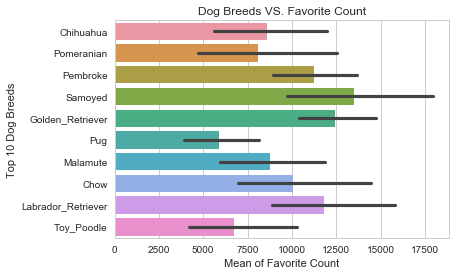

In [865]:
%pylab inline
sns.set_style("whitegrid")
favorite_counts_top10dog = sns.barplot(x="favorite_count", y="prediction_top1", data=top_10_dog_df)
favorite_counts_top10dog.set_ylabel('Top 10 Dog Breeds')

plt.title('Dog Breeds VS. Favorite Count')
plt.xlabel('Mean of Favorite Count')

fig =favorite_counts_top10dog.get_figure()
fig.savefig('favorite_counts_top10dog.png') 

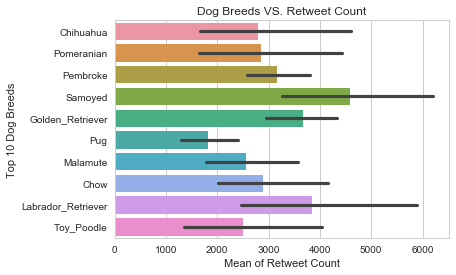

In [866]:
sns.set_style("whitegrid")
retweet_counts_top10dog = sns.barplot(x="retweet_count", y="prediction_top1", data=top_10_dog_df)
retweet_counts_top10dog.set_ylabel('Top 10 Dog Breeds')

plt.title('Dog Breeds VS. Retweet Count')
plt.xlabel('Mean of Retweet Count')

fig =retweet_counts_top10dog.get_figure()
fig.savefig('retweet_counts_top10dog.png') 

In [774]:
top_10_dog_df.groupby('prediction_top1', as_index=False).mean().sort_values('favorite_count')

prediction_top1  rating_numerator  rating_denominator  retweet_count  favorite_count
7                 Pug         10.240741           10.000000    1822.203704     5897.574074
9          Toy_Poodle         11.054054           10.000000    2493.243243     6735.513514
6          Pomeranian         11.151316           10.000000    2853.394737     8088.526316
0           Chihuahua         10.692308           10.000000    2791.576923     8586.141026
4            Malamute         10.896552           10.000000    2559.896552     8764.379310
1                Chow         11.609756           10.000000    2890.926829    10083.292683
5            Pembroke         11.443182           10.000000    3159.784091    11247.261364
3  Labrador_Retriever         13.936170           12.553191    3850.936170    11812.021277
2    Golden_Retriever         12.227941           10.588235    3668.817518    12416.518248
8             Samoyed         11.700000           10.000000    4582.525000    13505.075000

From the statistics and the plots above, we can see that Samoyed has the most average retweet counts and favorite counts. Samoyed is the most popular breed. 

### When People Like to Retweet Most in a Day

Using the data of timestamp and the retweet_count, we can get the median retweet numbers of the tweets posted at different hours. By doing so, we can figure out when people like to retweet most in a day.  

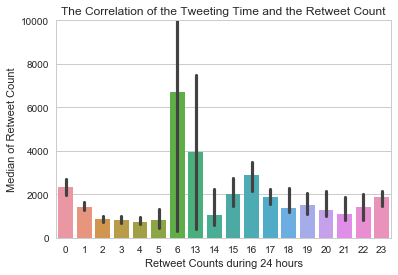

In [867]:
archive_clean['hour'] = archive_clean['timestamp'].apply(lambda x: x.hour)
g=sns.barplot( x="hour", y="retweet_count", data=archive_clean, estimator=median)
g.set_xlabel('Retweet Counts during 24 hours')
g.set(ylim=(0, 10000)) #to remove the outliers, I set the limit of y axis as 10,000

plt.title('The Correlation of the Tweeting Time and the Retweet Count')
plt.ylabel('Median of Retweet Count')

fig =g.get_figure()
fig.savefig('most_tweet.png') 

In [811]:
archive_clean.hour.value_counts()

1     289
0     258
2     223
16    201
3     179
17    170
23    115
18    108
4      99
15     95
19     87
20     85
21     73
22     73
5      27
14      9
6       4
13      2
Name: hour, dtype: int64

In [814]:
archive_clean[['hour','retweet_count']].groupby('hour', as_index=False).median().sort_values('retweet_count')

hour  retweet_count
4      4          727.0
3      3          830.0
5      5          831.0
2      2          866.0
8     14         1035.0
15    21         1075.0
14    20         1270.0
12    18         1352.0
1      1         1418.0
16    22         1434.0
13    19         1509.0
11    17         1889.5
17    23         1894.0
9     15         2020.0
0      0         2323.5
10    16         2883.0
7     13         3947.0
6      6         6709.0

@dog_rates loves to tweet at 1 AM UTC (5pm PST); there are 289 tweets posted at 1 AM. However, the tweets which posted at 6 AM UTC (10pm PST) have the largest median, 6,709 retweet. 

### The Rating Matters or Not

I would like to know if there's any correlation between the ratings and the favorite counts, so I will use the data in 'rating_numerator','rating_denominator'and 'favorite_count' columns to analyze the relationship of the ratings and the followers' preferences.  

In [855]:
rating_favorite=archive_clean.copy()
rating_favorite['rating'] = rating_favorite['rating_numerator'] / rating_favorite['rating_denominator']
rating_favorite=rating_favorite[rating_favorite.rating <= 2] #to remove the outliers, I will only use the ratings below 2
rating_favorite=rating_favorite[(rating_favorite.favorite_count <=130000)] #to remove the outliers, I will limit favorite count below 130,000                                                                                 


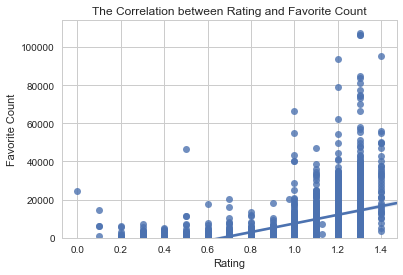

In [868]:
ratingplot=sns.regplot(x='rating',y='favorite_count', data=rating_favorite)
ratingplot.set(ylim=(0, None))
plt.title('The Correlation between Rating and Favorite Count')
plt.xlabel('Rating')
plt.ylabel('Favorite Count')

fig =ratingplot.get_figure()
fig.savefig('ratingplot.png') 

In [858]:
rating_favorite[['rating', 'favorite_count']].corr()

rating  favorite_count
rating          1.000000        0.412653
favorite_count  0.412653        1.000000

The Pearson's r of rating and favorite count is around 0.4, which means there is a moderately positive correlation between the variables. The ratings somewhat reflect people's preferences for dogs.    